**Essa é uma análise com o objetivo e mapear, inicialmente, e depois fazer uma predição sobre quais são os clientes que dão Churn na base de dados escolhida**

Colunas e descrição: BOTAR DEPOIS

# Carregando bibliotecas

In [1]:
# Manipulação de dados
import pandas as pd
import numpy as np

# ANalise exploratória
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import skew

# Carregando DataSet

In [2]:
df_clientes = pd.read_csv('/content/drive/MyDrive/Universidade de dados/Semana 3/Bank Customer Churn Prediction.csv')
df_clientes.head(5)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Analisando informações iniciais, como nulidade, tipos, shape, etc

In [3]:
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


Analisando os valores unicos

In [4]:
df_clientes.nunique().sort_values()

gender                  2
credit_card             2
active_member           2
churn                   2
country                 3
products_number         4
tenure                 11
age                    70
credit_score          460
balance              6382
estimated_salary     9999
customer_id         10000
dtype: int64

Analisando a porcentagem dos clientes que saem e ficam no banco

In [5]:
contagem_churn = df_clientes['churn'].value_counts()

# Calcule a porcentagem de cada valor
porcentagem_churn = (contagem_churn / contagem_churn.sum()) * 100

# Exiba as porcentagens
print("Porcentagem dos clientes que ficam no banco:", porcentagem_churn[0], "%")
print("Porcentagem dos clientes que NÃO ficam no banco:", porcentagem_churn[1], "%")

Porcentagem dos clientes que ficam no banco: 79.63 %
Porcentagem dos clientes que NÃO ficam no banco: 20.369999999999997 %


In [6]:
# Vamos analisar em quais paises o banco atua
df_clientes['country'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

Analisando a idade dos clientes da base de dados

(array([ 611., 2179., 3629., 1871.,  828.,  523.,  208.,  127.,   20.,
           4.]),
 array([18. , 25.4, 32.8, 40.2, 47.6, 55. , 62.4, 69.8, 77.2, 84.6, 92. ]),
 <BarContainer object of 10 artists>)

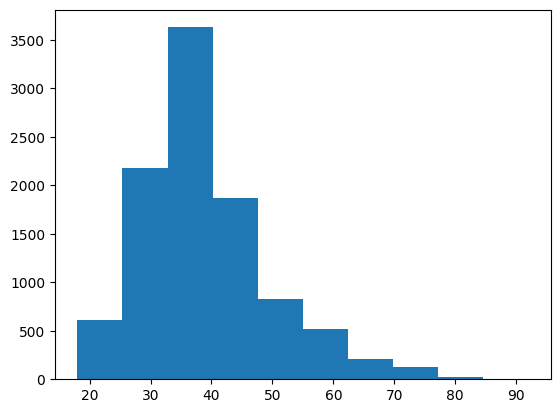

In [7]:
plt.hist(x=df_clientes['age'])

In [8]:
print(df_clientes['age'].min(), df_clientes['age'].max())

18 92


Analisando o saldo dos clientes

(array([3.623e+03, 6.900e+01, 3.600e+02, 1.173e+03, 2.081e+03, 1.747e+03,
        7.290e+02, 1.860e+02, 3.000e+01, 2.000e+00]),
 array([     0.   ,  25089.809,  50179.618,  75269.427, 100359.236,
        125449.045, 150538.854, 175628.663, 200718.472, 225808.281,
        250898.09 ]),
 <BarContainer object of 10 artists>)

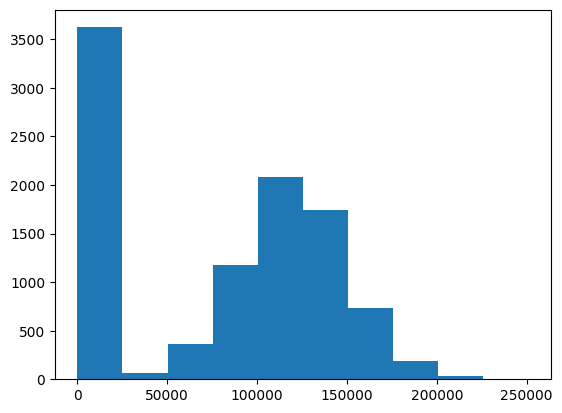

In [9]:
plt.hist(x=df_clientes['balance'])

In [10]:
print(df_clientes['balance'].min(), df_clientes['balance'].max())

0.0 250898.09


Com isso, percebemos que nessa base de dados, existem clientes que não tem saldo, vamos verificar eles usando query

In [11]:
df_clientes.query("balance == 0")

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.0,1,1,1,101348.88,1
3,15701354,699,France,Female,39,1,0.0,2,0,0,93826.63,0
6,15592531,822,France,Male,50,7,0.0,2,1,1,10062.80,0
11,15737173,497,Spain,Male,24,3,0.0,2,1,0,76390.01,0
12,15632264,476,France,Female,34,10,0.0,2,1,0,26260.98,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,15605622,841,Spain,Male,28,4,0.0,2,1,1,179436.60,0
9992,15657105,726,Spain,Male,36,2,0.0,1,1,0,195192.40,0
9994,15719294,800,France,Female,29,2,0.0,2,0,0,167773.55,0
9995,15606229,771,France,Male,39,5,0.0,2,1,0,96270.64,0


Verificando o histograma do churn dos clientes sem saldo

Analisando a porcentagem dos clientes sem saldo que ficam e saem do banco

In [12]:
contagem_churn = df_clientes[df_clientes['balance']==0]['churn'].value_counts()

# Calcule a porcentagem de cada valor
porcentagem_churn = (contagem_churn / contagem_churn.sum()) * 100

# Exiba as porcentagens
print("Porcentagem dos clientes que ficam no banco:", porcentagem_churn[0], "%")
print("Porcentagem dos clientes que NÃO ficam no banco:", porcentagem_churn[1], "%")

Porcentagem dos clientes que ficam no banco: 86.17638927287807 %
Porcentagem dos clientes que NÃO ficam no banco: 13.823610727121924 %


Podemos ver que a porcentagem dos clientes não tem saldo que ficam no banco é maior do que o geral, calculado acima

Vamos analisar os clientes que estão entre os que tem maior salario ou que estão entre os clientes com maior saldo, uma especie de clientes premium

In [13]:
df_clientes.query(f"balance in {df_clientes.balance.nlargest(3).to_list()} or estimated_salary in {df_clientes.estimated_salary.nlargest(3).to_list()}")

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
2092,15757408,655,Spain,Male,38,3,250898.09,3,0,1,81054.00,1
3280,15715622,583,France,Female,57,3,238387.56,1,0,1,147964.99,1
3580,15634359,639,Germany,Female,41,5,98635.77,1,1,0,199970.74,0
4417,15697270,608,Spain,Male,27,4,153325.10,1,1,1,199953.33,0
6646,15662021,685,Spain,Female,42,2,0.00,2,0,0,199992.48,0
8733,15714241,749,Spain,Male,42,9,222267.63,1,0,0,101108.85,1


# Analise exploratoria dos dados

## Gender

In [14]:
df_clientes.gender.value_counts(normalize=True)

Male      0.5457
Female    0.4543
Name: gender, dtype: float64

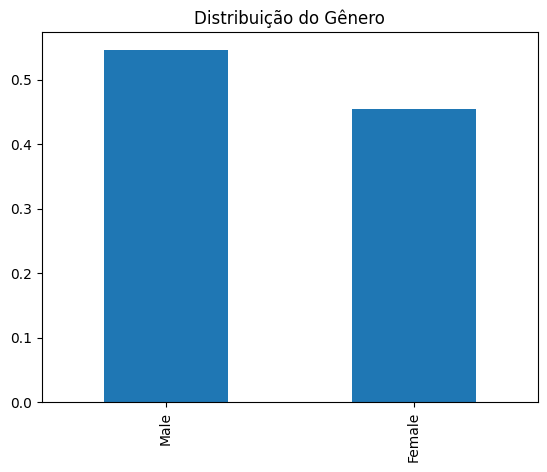

In [15]:
_ = df_clientes.gender.value_counts(normalize=True).plot.bar()
_ = plt.title("Distribuição do Gênero")

Analise sobre a distribuição de renda, tando de balance quanto de estimated_salary entre os dois generos

In [16]:
fig = px.box(df_clientes, x='gender', y='balance', color='gender',
             labels={'gender': 'Gênero', 'balance': 'Balance'},
             title='Distribuição de Balance por Gênero')

# Personalize o layout do gráfico, se necessário
fig.update_layout(
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    title_font_size=16,
    legend_title_text='',
)

# Exiba o gráfico
fig.show()

fig = px.box(df_clientes, x='gender', y='estimated_salary', color='gender',
             labels={'gender': 'Gênero', 'balance': 'Balance'},
             title='Distribuição de Balance por Gênero')

# Personalize o layout do gráfico, se necessário
fig.update_layout(
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    title_font_size=16,
    legend_title_text='',
)

# Exiba o gráfico
fig.show()

Com isso chegamos a conclusão de que para o saldo, os homens tem uma media e valor maximo ligeiramente maior, enquanto para o salario estimado, as mulheres um uma media/maximo maior

## Explorando os paises de atuação, credito dos clientes, cartao de credito e atividade dos membros

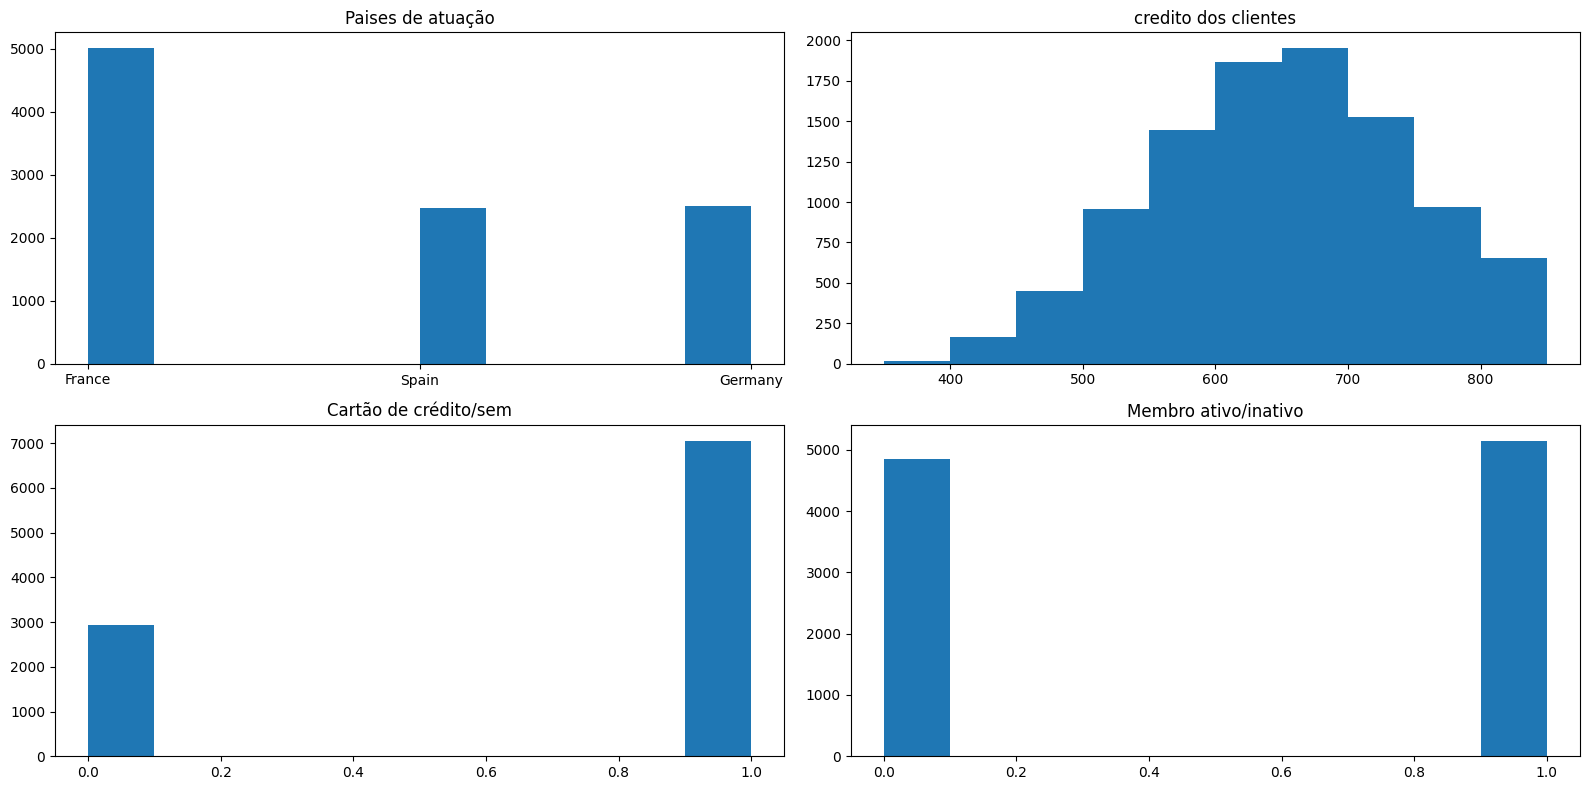

In [17]:
# Crie uma figura com subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 8))

# Plote o primeiro subplot
plt.subplot(2, 2, 1)
plt.hist(df_clientes['country'])
plt.title('Paises de atuação')

# Plote o segundo subplot
plt.subplot(2, 2, 2)
plt.hist(df_clientes['credit_score'])
plt.title('credito dos clientes')

# Plote o terceiro subplot
plt.subplot(2, 2, 3)
plt.hist(df_clientes['credit_card'])
plt.title('Cartão de crédito/sem')

# Plote o quarto subplot
plt.subplot(2, 2, 4)
plt.hist(df_clientes['active_member'])
plt.title('Membro ativo/inativo')

# Ajuste o layout
plt.tight_layout()

# Exiba o gráfico
plt.show()


- Com esse gráficos, podemos inferir que:
- A maioria dos clientes são da França
- A maioria dos clientes tem cartão de crédito
- A maioria dos clientes tem um score mediano alto
- Apesar de ter uma pequena diferença, a maioria dos clientes são ativos

## Membros inativos

Como temos uma grande quantidade de membros inativos, vamos fazer algumas analises sobre eles, como saldo, salario, idade e genero

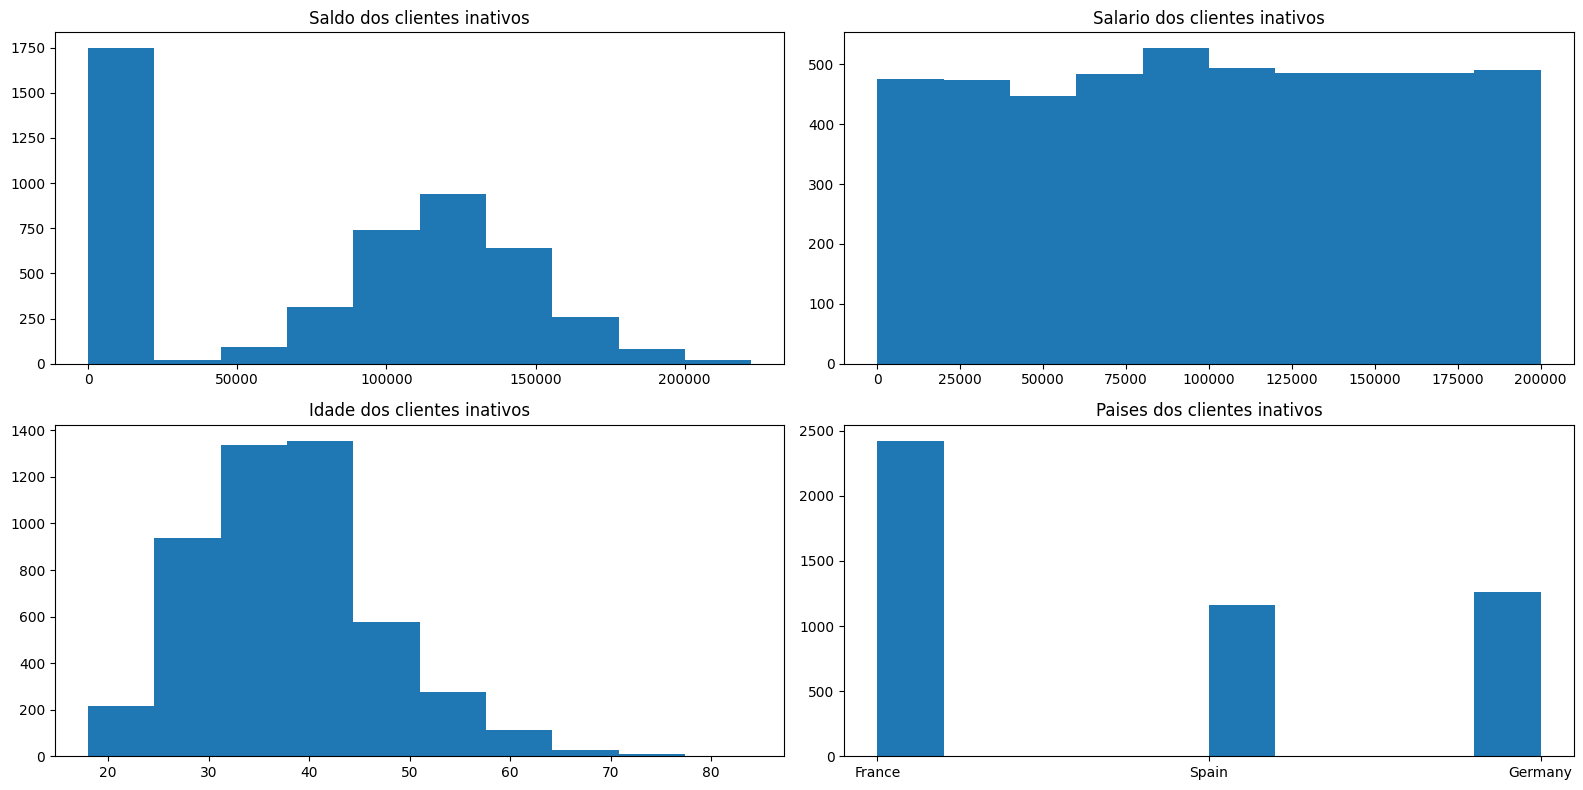

In [18]:
# Crie uma figura com subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 8))

# Plote o primeiro subplot
plt.subplot(2, 2, 1)
plt.hist(df_clientes[df_clientes['active_member'] == 0]['balance'])
plt.title('Saldo dos clientes inativos')

# Plote o segundo subplot
plt.subplot(2, 2, 2)
plt.hist(df_clientes[df_clientes['active_member'] == 0]['estimated_salary'])
plt.title('Salario dos clientes inativos')

# Plote o terceiro subplot
plt.subplot(2, 2, 3)
plt.hist(df_clientes[df_clientes['active_member'] == 0]['age'])
plt.title('Idade dos clientes inativos')

# Plote o quarto subplot
plt.subplot(2, 2, 4)
plt.hist(df_clientes[df_clientes['active_member'] == 0]['country'])
plt.title('Paises dos clientes inativos')

# Ajuste o layout
plt.tight_layout()

# Exiba o gráfico
plt.show()


O insight mais claro que podemos tirar é que as pessoas mais jovens são aquelas que são mais inativas, vamos olhar o salario das pessoas ate 40 anos, que são as mais inativas, pra saber se são inativos por ter um baixo salario, ou por escolha

Text(0.5, 1.0, 'Salario das pessoas mais jovens')

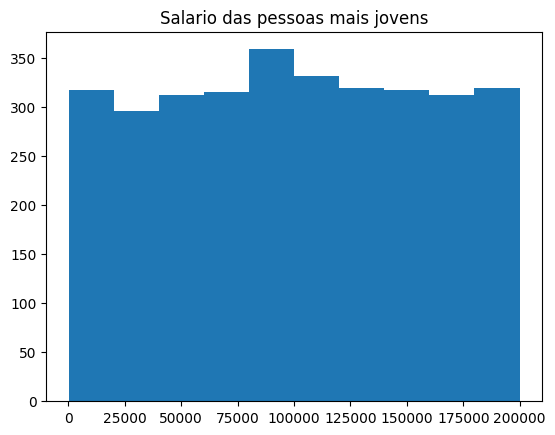

In [19]:
plt.hist(df_clientes[(df_clientes['age'] <= 40) & (df_clientes['active_member'] == 0)]['estimated_salary'])
plt.title('Salario das pessoas mais jovens')

Com isso podemos ver que grande parte dos jovens clientes inativos possuem um salário consideravel, evidenciando que não estão ativos no banco por escolha propria, talvez por preferirem a concorrencia, logo, seria importante o estudo da aplicação de politicas e beneficios voltados para alguns clientes jovens

## Clientes sem saldo

Vamos fazer uma análise na variável balance

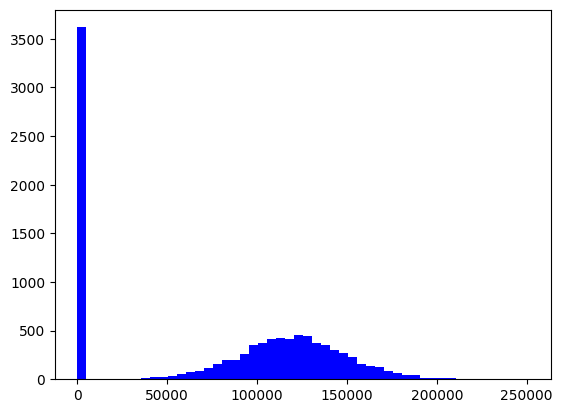

In [20]:
fig = plt.hist(df_clientes.balance, bins=50, color='b')

Grande parte dos clientes tem saldo 0, enquanto a maioria dos clientes que tem saldo maior que zero seguem uma curva quase normal, sendo a maioria deles entre 10000 e 150000

In [21]:
# Verificando a procentagem dos clientes com 0 de saldo
clientes_zerado = len(df_clientes.query("balance==0"))
total_clientes = len(df_clientes)
clientes_zerado/total_clientes

0.3617

aproximadamente 36% dos clientes não tem saldo

Fazendo algumas analises sobre esses clientes que não possuem saldo, explorando a distribuição de paises, salario, idade e hostorico de crédito deles

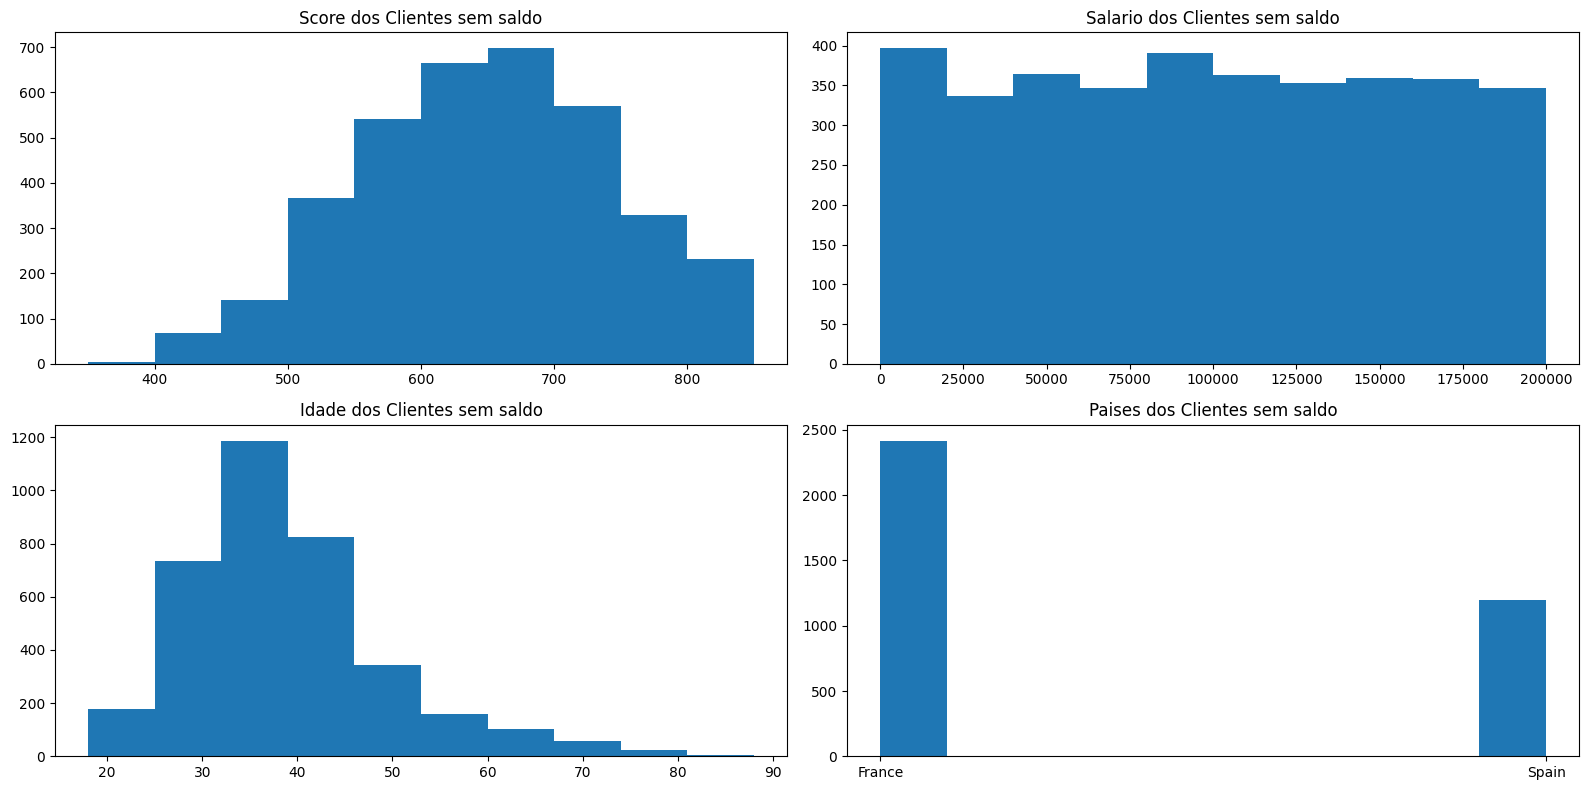

In [22]:
# Crie uma figura com subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 8))

# Plote o primeiro subplot
plt.subplot(2, 2, 1)
plt.hist(df_clientes[df_clientes['balance'] == 0]['credit_score'])
plt.title('Score dos Clientes sem saldo')

# Plote o segundo subplot
plt.subplot(2, 2, 2)
plt.hist(df_clientes[df_clientes['balance'] == 0]['estimated_salary'])
plt.title('Salario dos Clientes sem saldo')

# Plote o terceiro subplot
plt.subplot(2, 2, 3)
plt.hist(df_clientes[df_clientes['balance'] == 0]['age'])
plt.title('Idade dos Clientes sem saldo')

# Plote o quarto subplot
plt.subplot(2, 2, 4)
plt.hist(df_clientes[df_clientes['balance'] == 0]['country'])
plt.title('Paises dos Clientes sem saldo')

# Ajuste o layout
plt.tight_layout()

# Exiba o gráfico
plt.show()


- Dessa analise podemos concluir que:
- A maioria dos clientes sem saldo são aqueles que tem um score mediano alto
- A maioria dos clientes sem saldo são mais jovens
- No geral, ao que aparenta, a fato das pessoas dessa base de dados estarem sem saldo, não diz tanto a respeito a seu salario

Tentando analisar a relação entre salario e saldo de outra forma

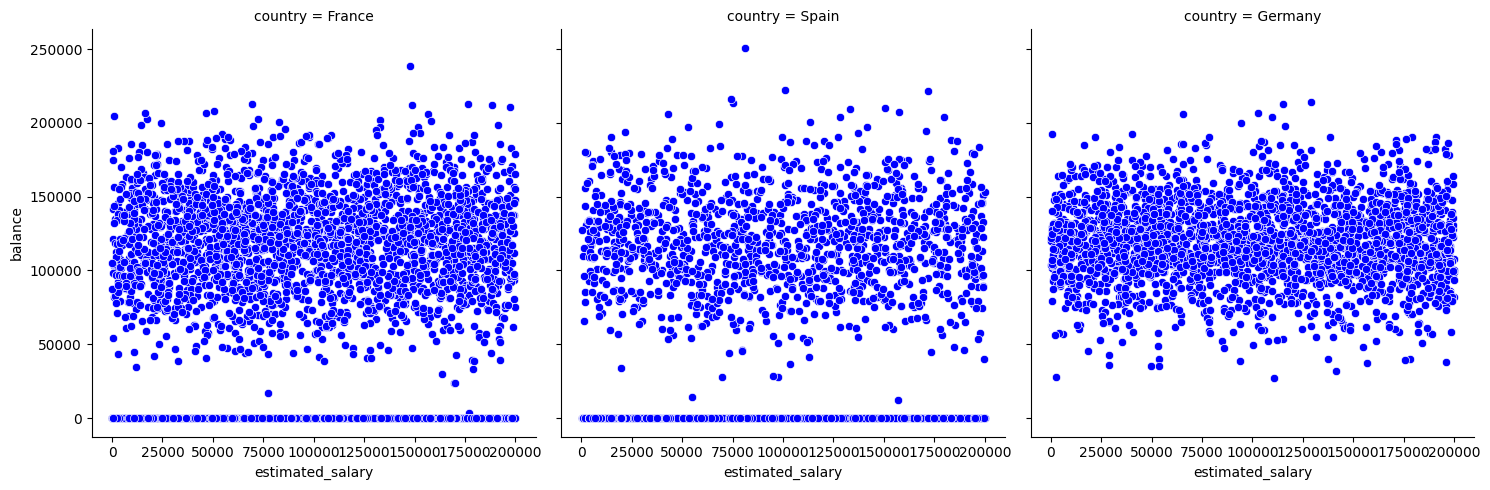

In [23]:
_ = sns.relplot(x = 'estimated_salary', y = 'balance', data=df_clientes, col='country', color='b')

O saldo desse grupo especifico está por motivos não relacionados apensas ao salario em si, podendo ser relacionado com seus gastos, sobre armazenar dinheiro em outras plataformas, deixar investido, entre outros

Vamos analisar a relação que as pessoas sem saldo tem com os membros inativos

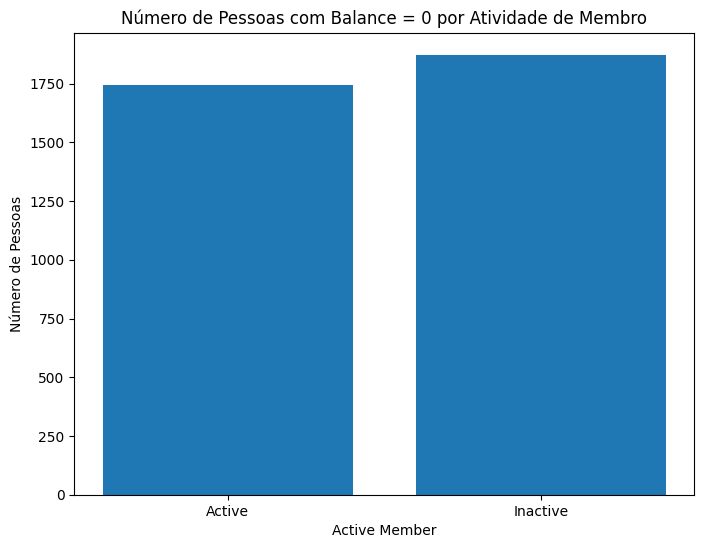

In [24]:
df_balance_zero = df_clientes[df_clientes['balance'] == 0]

# Contar o número de pessoas ativas (active_member = 1) e inativas (active_member = 0)
active_counts = df_balance_zero['active_member'].value_counts()

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(active_counts.index, active_counts.values)

# Configurar os rótulos dos eixos e título
plt.xticks(active_counts.index, ['Inactive', 'Active'])
plt.xlabel('Active Member')
plt.ylabel('Número de Pessoas')
plt.title('Número de Pessoas com Balance = 0 por Atividade de Membro')

# Mostrar o gráfico
plt.show()

Vamos analisar a porcentagem de pessoas que são inativas(no geral) comparativamente com as pessoas que são inativas com o saldo = 0

In [25]:
total_persons = len(df_clientes)
inactive_persons = len(df_clientes[df_clientes['active_member'] == 0])
percentage_inactive_overall = (inactive_persons / total_persons) * 100

# Calcule a porcentagem de pessoas inativas com balance = 0
total_persons_with_balance_zero = len(df_clientes[df_clientes['balance']==0])
inactive_with_balance_zero = len(df_clientes[(df_clientes['active_member'] == 0) & (df_clientes['balance'] == 0)])
percentage_inactive_with_balance_zero = (inactive_with_balance_zero / total_persons_with_balance_zero) * 100

# Exiba os resultados
print(f'Porcentagem de pessoas inativas no geral: {percentage_inactive_overall:.2f}%')
print(f'Porcentagem de pessoas inativas com balance = 0: {percentage_inactive_with_balance_zero:.2f}%')

Porcentagem de pessoas inativas no geral: 48.49%
Porcentagem de pessoas inativas com balance = 0: 48.22%


Com isso, percebemos que aparentemente, NÃO há uma correlação direta entre as pessoas que tem saldo 0 e as que são inativas

## Idade

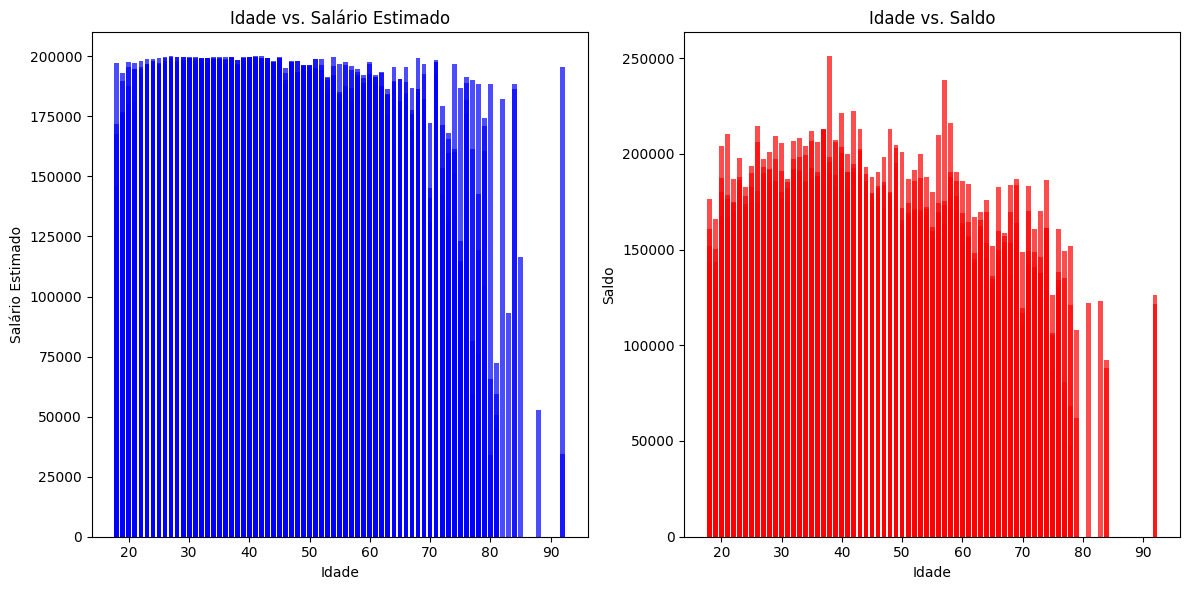

In [26]:
# Crie um gráfico de barras com idade no eixo x e salário estimado e saldo no eixo y
plt.figure(figsize=(12, 6))  # Define o tamanho da figura

# Gráfico de barras para idade vs. salário estimado
plt.subplot(1, 2, 1)  # Cria o primeiro subplot
plt.bar(df_clientes['age'], df_clientes['estimated_salary'], color='blue', alpha=0.7)
plt.xlabel('Idade')
plt.ylabel('Salário Estimado')
plt.title('Idade vs. Salário Estimado')

# Gráfico de barras para idade vs. saldo
plt.subplot(1, 2, 2)  # Cria o segundo subplot
plt.bar(df_clientes['age'], df_clientes['balance'], color='red', alpha=0.7)
plt.xlabel('Idade')
plt.ylabel('Saldo')
plt.title('Idade vs. Saldo')

# Ajuste o layout
plt.tight_layout()

# Exiba os gráficos de barras
plt.show()

- As conclusões que podemos tirar desses gráficos são:
- Apesar de não se manter para pessoas com idade bem mais avançada, a partir de 80 anos, o primeiro grafico demonstra, curiosamente, uma homogeneidade na relação entre idade e salario
- Apesar do salario com o passar da idade se manter, via de regra, ocorre uma queda significativa do saldo com o passar do tempo. Para fazer uma analise mais precisa, teriamos que ter o padrao de compra desses clientes, para saber se o custo de vida deles aumenta com o passar da idade, ou se essa diminuição do saldo é causada por outros fatores

## Analise de Churn

## Salario e saldo

Vendo a quantidade de pessoas que ficam no banco e as que saem

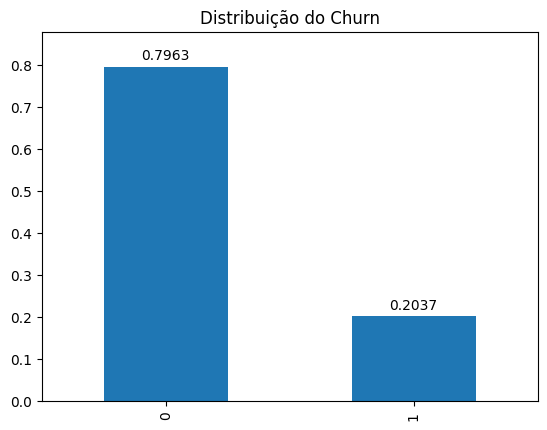

In [27]:
_ = df_clientes.churn.value_counts(1).plot.bar()
_ = plt.title("Distribuição do Churn")
_ = plt.text(-0.1, 0.815, df_clientes.churn.value_counts(1)[0])
_ = plt.text(0.9, 0.22, df_clientes.churn.value_counts(1)[1])
_ = plt.ylim(0, 0.88)

Vamos tentar achar alguns indicadores para a saida do banco, vamos analisar os graficos de boxplot de churn tanto com o salario tanto com o saldo das pessoas e tentar achar alguma diferença entre essas duas variaveis para as pessoas que saem ou não do banco

In [28]:
fig = px.box(df_clientes, x='churn', y='balance', color='churn')

# Personalize o layout do gráfico, se necessário
fig.update_layout(
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    title_font_size=16,
    legend_title_text='',
)

# Exiba o gráfico
fig.show()

fig = px.box(df_clientes, x='churn', y='estimated_salary', color='churn')

# Personalize o layout do gráfico, se necessário
fig.update_layout(
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    title_font_size=16,
    legend_title_text='',
)

# Exiba o gráfico
fig.show()

- O salario aparentemente não é um bom indicador, uma vez que o boxplot das pessoas que saem do banco e das que permanecem são extremamente similares
- Quanto ao saldo, podemos percebeber que, curiosamente, as pessoas que saem do banco costumam ter um saldo ligeiramente maior do que as pessoas que ficam, vamos analisar melhor essa relação

In [29]:
agg_func = {
    'estimated_salary':['min', 'median', 'mean', 'std', skew],
    'balance':['min', 'median', 'mean', 'std', skew],
    'age':['min', 'median', 'mean', 'std', skew]
}

df_clientes.groupby('churn').agg(agg_func)

estimated_salary                                                    \
                   min     median           mean           std      skew   
churn                                                                      
0                90.07   99645.04   99738.391772  57405.586966  0.010994   
1                11.58  102460.84  101465.677531  57912.418071 -0.033080   

      balance                                                  age         \
          min     median          mean           std      skew min median   
churn                                                                       
0         0.0   92072.68  72745.296779  62848.040701 -0.046879  18   36.0   
1         0.0  109349.29  91108.539337  58360.794816 -0.512354  18   45.0   

                                       
            mean        std      skew  
churn                                  
0      37.408389  10.125363  1.377439  
1      44.837997   9.761562  0.077920

Temos uma diferença significativa na media, as pessoas que dão churn tem 20000 a mais, vamos analisar se isso tem influencia das pessoas que tem saldo 0, na idade tivemos uma diferença pouco significativa, na qual as pessoas que dão churn tendem a ter uma idade um pouco mais elevada

## Inatividade

Vamos analisar o comportamente das pessoas inativas, será que elas tem uma maior tendencia a dar churn? será que tem uma maior permanencia? ou não há uma correlação suficientemente significativa entre as variáveis

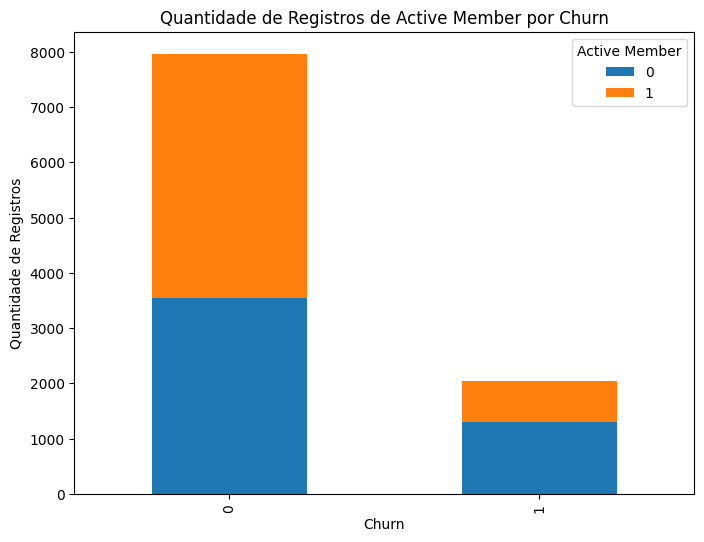

In [30]:
# Contar a quantidade de registros de 0 e 1 em active_member para cada valor de churn
counts = df_clientes.groupby(['churn', 'active_member']).size().unstack(fill_value=0)

# Criar o gráfico de barras
counts.plot(kind='bar', stacked=True, figsize=(8, 6))

# Configurar os rótulos dos eixos e título
plt.xlabel('Churn')
plt.ylabel('Quantidade de Registros')
plt.title('Quantidade de Registros de Active Member por Churn')

# Mostrar o gráfico
plt.legend(title='Active Member', labels=['0', '1'])
plt.show()

Com isso, podemos analisar que os clientes que tem uma tendencia maior a dar churn são os inativos, enquanto os que tem uma maior tendencia a ficar(mesmo que nesse caso, seja bem parelha) são os ativos, podemos fazer um estudo de caso para aplicação de politicas de permanencia para os usuarios inativos, uma vez que eles são os que mais tem tendencia a sair

## Paises

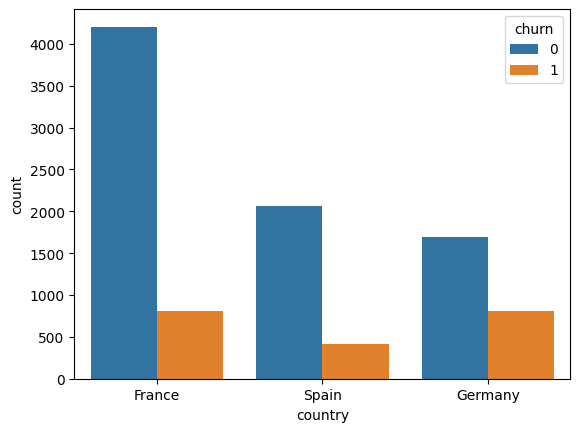

In [31]:
_ = sns.countplot(data=df_clientes, x='country', hue='churn')

Com isso, aparentemente o pior pais em termino de churn seria alemanha, para analisar mais precisamente vamos analisar a media de churn para cada pais

In [32]:
df_clientes.groupby('country')['churn'].mean().sort_values()

country
France     0.161548
Spain      0.166734
Germany    0.324432
Name: churn, dtype: float64

Com isso, ficou perceptivel que na alemanha tem uma taxa de churn muito maior, basicamente o dobro, enquanto franca e  espanha tem uma taxa quase identica

## Cartão de crédito

Vamos ver se a fato de possuir cartão de credito influencia na taxa de churn

In [33]:
df_clientes.groupby('credit_card')['churn'].mean().sort_values()

credit_card
1    0.201843
0    0.208149
Name: churn, dtype: float64

Percebemos que aparentemente não há uma correlação entre essas duas variavesi